# Install biopandas

In [46]:
%pip install biopandas

# Analysis of Structural basis for human coronavirus attachment to sialic acid receptors

source: [corona virus db](https://www.rcsb.org/structure/6NZK)

In [0]:
from biopandas.pdb import PandasPdb

ppdb_df =  PandasPdb().read_pdb('6nzk.pdb')


In [48]:
type(ppdb_df.df)

dict

In [49]:
ppdb_df.df.keys()

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

**PDB file format**

In the PDB data file format for macromolecular models, each atom is designated either ATOM or HETATM (which stands for hetero atom).

ATOM is reserved for atoms in standard residues of protein, DNA or RNA.

HETATM is applied to non-standard residues of protein, DNA or RNA, as well as atoms in other kinds of groups, such as carbohydrates, substrates, ligands, solvent, and metal ions.

In [50]:
atom_df = ppdb_df.df['ATOM']
atom_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,VAL,,A,15,,,243.899,168.046,234.970,1.0,21.02,,,N,NaN,2228
1,ATOM,2,,CA,,VAL,,A,15,,,242.790,167.265,235.486,1.0,20.16,,,C,NaN,2229
2,ATOM,3,,C,,VAL,,A,15,,,241.467,167.937,235.173,1.0,20.05,,,C,NaN,2230
3,ATOM,4,,O,,VAL,,A,15,,,241.446,169.111,234.795,1.0,20.22,,,O,NaN,2231
4,ATOM,5,,CB,,VAL,,A,15,,,242.958,167.113,237.008,1.0,25.47,,,C,NaN,2232


In [51]:
het_df = ppdb_df.df['HETATM']
het_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,HETATM,27454,,C1,,NAG,,A,2133,,,231.126,169.511,248.342,1.0,42.26,,,C,NaN,29681
1,HETATM,27455,,C2,,NAG,,A,2133,,,230.270,169.202,249.579,1.0,46.81,,,C,NaN,29682
2,HETATM,27456,,C3,,NAG,,A,2133,,,231.202,169.463,250.765,1.0,52.01,,,C,NaN,29683
3,HETATM,27457,,C4,,NAG,,A,2133,,,232.433,168.550,250.708,1.0,56.17,,,C,NaN,29684
4,HETATM,27458,,C5,,NAG,,A,2133,,,233.124,168.838,249.377,1.0,48.37,,,C,NaN,29685


**Visualize the b_factor**

what is b_factor?

The B-factor describes the displacement of the atomic positions from an average (mean) value (mean-square displacement).

The core of the molecule usually has low B-factors, due to tight packing of the side chains (enzyme active sites are usually located there). The values of the B-factors are normally between 15 to 30 (sq. Angstroms), but often much higher than 30 for flexible regions.

In [0]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'B-Factor')

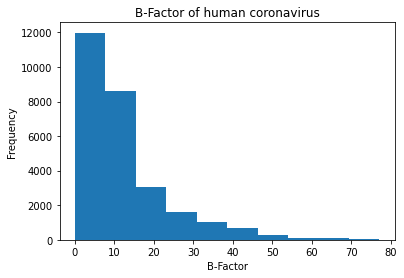

In [53]:
atom_df['b_factor'].plot(kind='hist')
plt.title('B-Factor of human coronavirus')
plt.xlabel('B-Factor')

In [54]:
atom_df.element_symbol.unique()

array(['N', 'C', 'O', 'S'], dtype=object)

Text(0.5, 0, 'Element symbol')

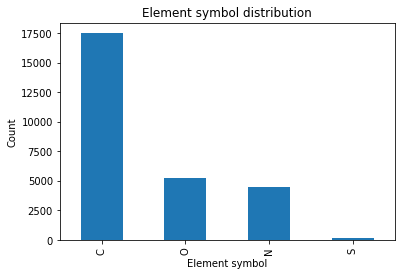

In [55]:
atom_df['element_symbol'].value_counts().plot(kind='bar')
plt.title('Element symbol distribution')
plt.ylabel('Count')
plt.xlabel('Element symbol')

Text(0.5, 0, 'atom_name symbol')

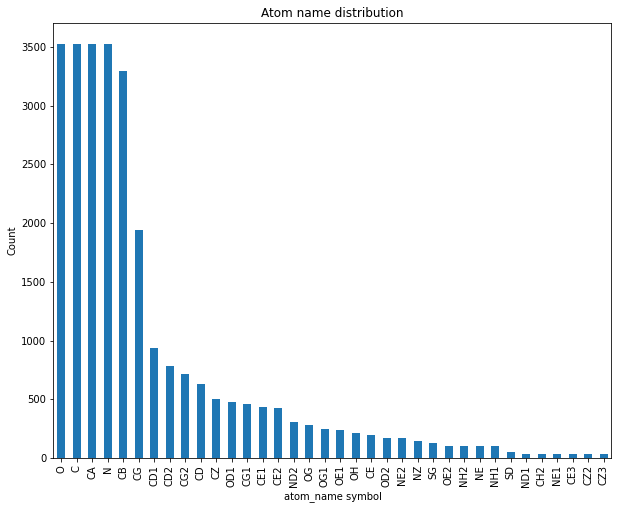

In [56]:
atom_df['atom_name'].value_counts().plot(kind='bar', figsize=(10,8))
plt.title('Atom name distribution')
plt.ylabel('Count')
plt.xlabel('atom_name symbol')

In PDB file formats , TER records separate protein and nucleic acid chains.But in 6nzk.pdb no such records are there.

In [57]:
atom_df[atom_df['record_name'] == 'TER']

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx


# Analysis of COVID-19 virus

dataset source: [COVID-19](https://www.rcsb.org/structure/6lu7)

In [0]:
ppdb_df =  PandasPdb().read_pdb('6lu7.pdb')

In [0]:
catom_df = ppdb_df.df['ATOM']
chtm_df = ppdb_df.df['HETATM']

In [63]:
catom_df.head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,1,,,-32.073,9.085,33.695,1.0,38.90,,,N,NaN,424
1,ATOM,2,,CA,,SER,,A,1,,,-32.156,8.073,34.741,1.0,37.44,,,C,NaN,425
2,ATOM,3,,C,,SER,,A,1,,,-30.857,8.000,35.536,1.0,34.96,,,C,NaN,426
3,ATOM,4,,O,,SER,,A,1,,,-30.047,8.926,35.507,1.0,33.29,,,O,NaN,427
4,ATOM,5,,CB,,SER,,A,1,,,-32.483,6.704,34.140,1.0,44.07,,,C,NaN,428


Text(0.5, 0, 'B-Factor')

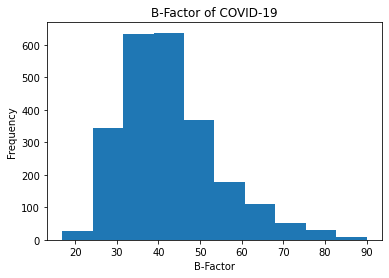

In [67]:
catom_df['b_factor'].plot(kind='hist')
plt.title('B-Factor of COVID-19')
plt.xlabel('B-Factor')

Text(0.5, 0, 'Element symbol')

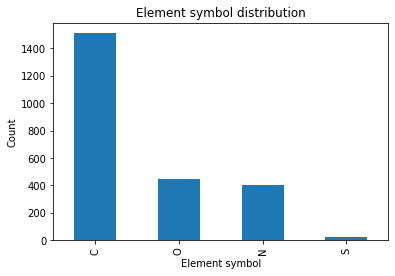

In [68]:
catom_df['element_symbol'].value_counts().plot(kind='bar')
plt.title('Element symbol distribution')
plt.ylabel('Count')
plt.xlabel('Element symbol')

Text(0.5, 0, 'atom_name symbol')

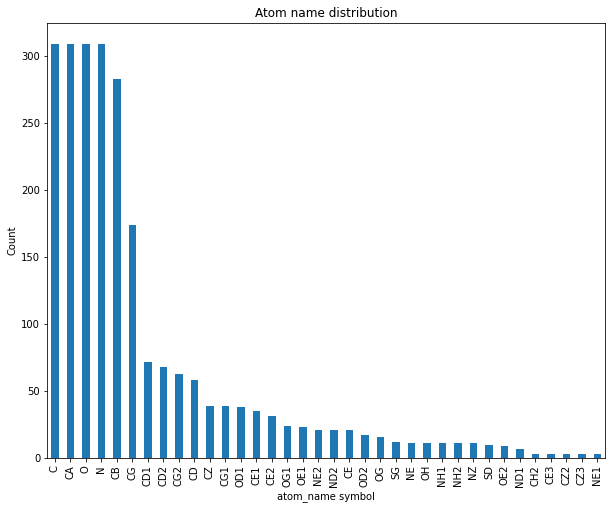

In [81]:
catom_df['atom_name'].value_counts().plot(kind='bar', figsize=(10,8))
plt.title('Atom name distribution')
plt.ylabel('Count')
plt.xlabel('atom_name symbol')

# Insights from the above findings

It is observed that **COVID-19 has high b_factor** which means it is **not tightly packed**